#Simple aspect based sentiment analysis with NLTK, Textblob and StanfordNLP

In [111]:
!pip install stanfordnlp

In [112]:
# !pip install torch==1.5.0
import torch
torch.__version__

'1.5.0'

In [113]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from nltk.corpus import stopwords
import re
from textblob import TextBlob
from nltk import word_tokenize

from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
import stanfordnlp
from wordcloud import WordCloud, STOPWORDS 

Mount google drive

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the tweets csv file

In [115]:
#set path to the input cav containing tweets about squid games
twitr = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Files/Sentiment Analysis/tweets.csv")
twitr.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


In [116]:
twitr['text'].head()

0    When life hits and the same time poverty strik...
1    That marble episode of #SquidGame  ruined me. 😭😭😭
2                                      #Squidgame time
3    //Blood on 1st slide\nI'm joining the squidgam...
4    The two first games, players were killed by th...
Name: text, dtype: object

In [117]:
#converting the content column into list and taking only 1500 tweets for reducing time consumption
tweets = twitr['text'].to_list()
tweets=np.unique(tweets)
tweets = tweets.tolist()
tweets = tweets[:1500]
tweets

['!! #SQUIDGAME SPOILERS!!\n-\n-\n-\n-\nVIDEO KILLED THE RADIO STAR https://t.co/U0hvZ7hN3j',
 '!! IMPLIED #SQUIDGAME SPOILERS !!\n-\n-\n-\n-\n-\n-\nme towards sang-woo from ep 2+ then from ep 9 https://t.co/RS4ZtYiOtM',
 '!! implied #squidgame spoilers !!\n-\n-\n-\n-\nme thinking about sae-byeok, junho, ji-young, and ali https://t.co/JccQ0o1doY',
 '!SQUID GAME SPOILERS!\n\nNobody:\nFront man watching people die in ep. 1 be like:\n\nHELP I HATE THIS DRAWING AND THIS L… https://t.co/lKJ7gWM7H7',
 '!spoiler warning\n\n» finalists \n\nhey! do you remember dancing in september?\n\n#SquidGame #JujutsuKaisen #GojoSatoru… https://t.co/rM9mHFQA3N',
 '" #SquidGame " is not about the bloody games, but about a human being. \n\nI agree that the last episode is the weakest.',
 '" I did this selfie of what I feel inside , I feel one should never speak evil or seek it "-FreedomMercado #mypath… https://t.co/7KrVkPGWZo',
 '" I had fun while it lasted, and I\'m glad I got to spend it with you... "\n#太敦 

In [118]:
len(tweets)

1500

Preprocess the tweets

In [119]:
nltk.download('punkt');
nltk.download('stopwords');
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [120]:
cleaned=[]
#clean the tweets of urls, usernames and hashtags
def preprocess_tweet(text):
  #url
  cleaned= " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", text).split())
  #lowercase
  cleaned= "".join(cleaned.lower())
  #usernames
  cleaned= "".join(re.sub('@[^\s]+', '', cleaned))
  #urls
  cleaned = "".join(re.sub('http://\S+|https://\S+', '', cleaned))
  #hashtag
  cleaned= "".join(re.sub('#([^\s]+)', '', cleaned))
 
  return cleaned

In [121]:
#preprocessing the list of tweets
map_object = map(preprocess_tweet, tweets)
cleaned_tweets = list(map_object)
cleaned_tweets

['squidgame spoilersvideo killed the radio star',
 'implied squidgame spoilers me towards sangwoo from ep 2 then from ep 9',
 'implied squidgame spoilers me thinking about saebyeok junho jiyoung and ali',
 'squid game spoilersnobodyfront man watching people die in ep 1 be likehelp i hate this drawing and this l',
 'spoiler warning finalists hey do you remember dancing in septembersquidgame jujutsukaisen gojosatoru',
 'squidgame is not about the bloody games but about a human being i agree that the last episode is the weakest',
 'i did this selfie of what i feel inside i feel one should never speak evil or seek it freedommercado mypath',
 'i had fun while it lasted and im glad i got to spend it with you dazatsu dazushi squidgame',
 'this series taught us everything squidgame netflix onedirectionnetflix thnk u for making this am',
 'why did you ask me to join youyou were the only one who looked like whod come along',
 'thank you for playing with me squidgamefanart squidgame haikyuu kageh

Sentiment Analysis with polarity of the tweets

In [122]:
sentiment_objects = [TextBlob(tweet) for tweet in cleaned_tweets]
sentiment_objects[190].polarity, sentiment_objects[190]

(-0.21666666666666667,
 TextBlob("it is frightening it is shocking but its also beautiful jimmyfallon on squidgame fallontonight"))

In [123]:
sentiment_values = [[ str(tweet), tweet.sentiment.polarity] for tweet in sentiment_objects]

sentiment_values[190]

['it is frightening it is shocking but its also beautiful jimmyfallon on squidgame fallontonight',
 -0.21666666666666667]

In [124]:
#converting to a pandas dataframe
sentiment_df = pd.DataFrame(sentiment_values, columns=["tweet","polarity"])

sentiment_df

,tweet,polarity
0,squidgame spoilersvideo killed the radio star,-0.20
1,implied squidgame spoilers me towards sangwoo ...,0.00
2,implied squidgame spoilers me thinking about s...,0.00
3,squid game spoilersnobodyfront man watching pe...,-0.60
4,spoiler warning finalists hey do you remember ...,0.00
...,...,...
1495,rumor has it that the squidgame doll is a real...,-0.25
1496,runningman jeonsomin is player212 from squidga...,0.00
1497,runningman squidgame is fun to watch,0.30
1498,runningman playing games from squidgame throug...,0.00


Plotting the histogram of sentiment polarity

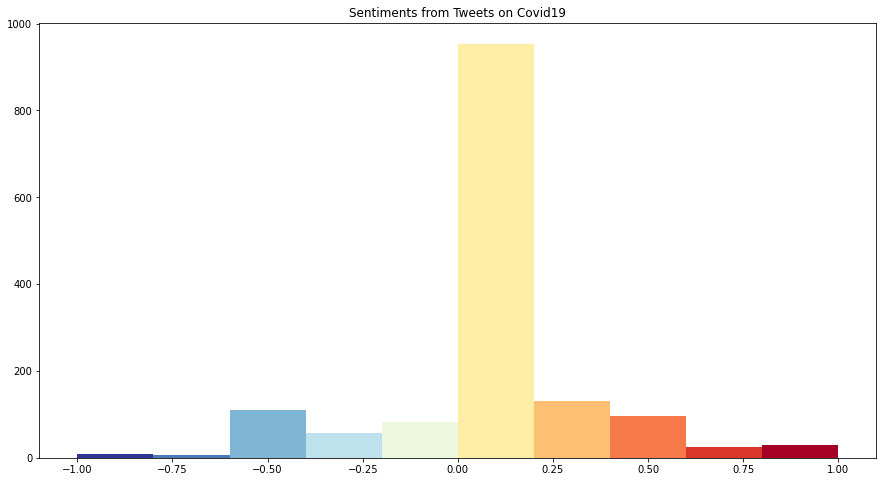

In [125]:
cm = plt.cm.get_cmap('RdYlBu_r')
plt.figure(figsize=(15,8))
n, bins, patches = plt.hist(sentiment_df['polarity'], 10, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title("Sentiments from Tweets on Covid19")
plt.show()

Setting the sentiment based on polarity

In [126]:
def sentiment(polarity):
  if (polarity < 0):
    return 'negative'
  elif (polarity == 0):
    return 'neutral'
  else:
    return 'positive'


In [127]:
sentiment_df['sentiment'] = sentiment_df['polarity'].apply(sentiment)

In [128]:
sentiment_df.head(20)

,tweet,polarity,sentiment
0,squidgame spoilersvideo killed the radio star,-0.200000,negative
1,implied squidgame spoilers me towards sangwoo ...,0.000000,neutral
2,implied squidgame spoilers me thinking about s...,0.000000,neutral
3,squid game spoilersnobodyfront man watching pe...,-0.600000,negative
4,spoiler warning finalists hey do you remember ...,0.000000,neutral
5,squidgame is not about the bloody games but ab...,-0.266667,negative
6,i did this selfie of what i feel inside i feel...,-1.000000,negative
7,i had fun while it lasted and im glad i got to...,0.400000,positive
8,this series taught us everything squidgame net...,0.000000,neutral
9,why did you ask me to join youyou were the onl...,0.000000,neutral


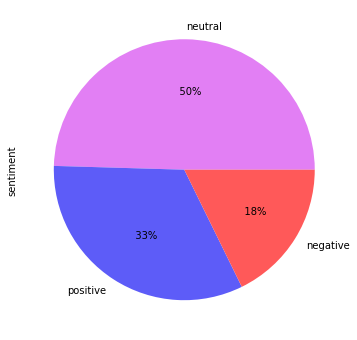

In [129]:
sentiment_df.sentiment.value_counts().plot(kind='pie', figsize=(8, 6), autopct='%5.0f%%', colors=["#E27FF4", "#5D5CF8", "#FF5959"])

Splitting the sentiment dataframe intro positive, negative and neutral dataframes

In [130]:
positive_df=sentiment_df.loc[sentiment_df['sentiment'] == 'positive']
positive_df

,tweet,polarity,sentiment
7,i had fun while it lasted and im glad i got to...,0.400000,positive
11,korea finds itself having achieved enormous pr...,0.100000,positive
13,squidgame dramatizes the horrors of modern ine...,0.200000,positive
14,squidgame follows in the wake of bong joonhos ...,0.633333,positive
16,squidgame works lesser as a thriller and more ...,0.208333,positive
...,...,...,...
1479,rigelprotocol farming v2 continues to grow and...,0.136364,positive
1480,rivetra x squidgame thanks for playing with me...,0.200000,positive
1483,roblox squidgame youtube check out our new vid...,0.136364,positive
1487,robloxdev roblox roblox robloxdev squidgame ma...,0.300000,positive


In [131]:
negative_df=sentiment_df.loc[sentiment_df['sentiment'] == 'negative']
negative_df

,tweet,polarity,sentiment
0,squidgame spoilersvideo killed the radio star,-0.200000,negative
3,squid game spoilersnobodyfront man watching pe...,-0.600000,negative
5,squidgame is not about the bloody games but ab...,-0.266667,negative
6,i did this selfie of what i feel inside i feel...,-1.000000,negative
12,squidgame tiktok video points out what the eng...,-0.250000,negative
...,...,...,...
1489,robloxdown wow why is it down i wanna play rob...,-0.027778,negative
1491,round6 squidgame round 6 squid game cast edit ...,-0.300000,negative
1492,round6 squidgame jung ho yeon de round6squid g...,-0.400000,negative
1493,rozandmocha play 30 seconds or less but the st...,-0.166667,negative


In [132]:
neutral_df=sentiment_df.loc[sentiment_df['sentiment'] == 'neutral']
neutral_df

,tweet,polarity,sentiment
1,implied squidgame spoilers me towards sangwoo ...,0.0,neutral
2,implied squidgame spoilers me thinking about s...,0.0,neutral
4,spoiler warning finalists hey do you remember ...,0.0,neutral
8,this series taught us everything squidgame net...,0.0,neutral
9,why did you ask me to join youyou were the onl...,0.0,neutral
...,...,...,...
1490,rockstargames gtaiv still nowwatching squidgam...,0.0,neutral
1494,ruffcoin where una dey see this money ofofonob...,0.0,neutral
1496,runningman jeonsomin is player212 from squidga...,0.0,neutral
1498,runningman playing games from squidgame throug...,0.0,neutral


Aspect term extraction for positive, negative and neutral tweets

> Indented block



In [133]:
#downlaod stanfordnlp package
stanfordnlp.download('en', resource_dir='/content/drive/MyDrive/Colab Notebooks/Files/Sentiment Analysis/stanfordnlp_resources')

Using the default treebank "en_ewt" for language "en".


In [134]:
positive_list = positive_df['tweet'].to_list()
negative_list = negative_df['tweet'].to_list()
neutral_list = neutral_df['tweet'].to_list()
positive_list

['i had fun while it lasted and im glad i got to spend it with you dazatsu dazushi squidgame',
 'korea finds itself having achieved enormous prosperity amp now worldwide cultural influence under an economic syste',
 'squidgame dramatizes the horrors of modern inequality amp exploitation in southkorea amp shreds the capitalist myth',
 'squidgame follows in the wake of bong joonhos best picture winning parasite shining a light on the way in wh',
 'squidgame works lesser as a thriller and more as a tragedy so even though every twist and turn is more or less',
 'squidgame halloween costumes are hot getting one may be a challenge via cbsmoneywatch halloweencostumes',
 'squidgame star heosungtae talks about which scene was scariest to film reuniting with leejungjae in new movie',
 'squidgame reportedly brought netflix nearly 900 milliion in earnings',
 'the ultimate dwindling resource in the human arrangement isnt cheap oil or potable water or even common sense',
 '69 is my favorite number h

Tokenizing and tagging part of speech

In [135]:
new_list_positive=[]
for line in positive_list:
    txt_list = nltk.word_tokenize(line)
    taggedList = nltk.pos_tag(txt_list)
    new_list_positive.append(taggedList)
    #print(taggedList)

new_list_negative=[]
for line in negative_list:
    txt_list = nltk.word_tokenize(line)
    taggedList = nltk.pos_tag(txt_list)
    new_list_negative.append(taggedList)
    #print(taggedList)

new_list_neutral=[]
for line in neutral_list:
    txt_list = nltk.word_tokenize(line)
    taggedList = nltk.pos_tag(txt_list)
    new_list_neutral.append(taggedList)
    #print(taggedList)

new_list_positive

[[('i', 'NN'),
  ('had', 'VBD'),
  ('fun', 'VBN'),
  ('while', 'IN'),
  ('it', 'PRP'),
  ('lasted', 'VBD'),
  ('and', 'CC'),
  ('im', 'JJ'),
  ('glad', 'NN'),
  ('i', 'NN'),
  ('got', 'VBD'),
  ('to', 'TO'),
  ('spend', 'VB'),
  ('it', 'PRP'),
  ('with', 'IN'),
  ('you', 'PRP'),
  ('dazatsu', 'VBP'),
  ('dazushi', 'JJ'),
  ('squidgame', 'NN')],
 [('korea', 'NN'),
  ('finds', 'VBZ'),
  ('itself', 'PRP'),
  ('having', 'VBG'),
  ('achieved', 'VBN'),
  ('enormous', 'JJ'),
  ('prosperity', 'NN'),
  ('amp', 'NN'),
  ('now', 'RB'),
  ('worldwide', 'RB'),
  ('cultural', 'JJ'),
  ('influence', 'NN'),
  ('under', 'IN'),
  ('an', 'DT'),
  ('economic', 'JJ'),
  ('syste', 'NN')],
 [('squidgame', 'NN'),
  ('dramatizes', 'VBZ'),
  ('the', 'DT'),
  ('horrors', 'NNS'),
  ('of', 'IN'),
  ('modern', 'JJ'),
  ('inequality', 'NN'),
  ('amp', 'NN'),
  ('exploitation', 'NN'),
  ('in', 'IN'),
  ('southkorea', 'JJ'),
  ('amp', 'NN'),
  ('shreds', 'VBZ'),
  ('the', 'DT'),
  ('capitalist', 'NN'),
  ('myth', 'NN'

In [136]:
len(new_list_positive)

491

In [137]:
#creating word list
def create_word_list(new_list):
    newwordList = []
    flag = 0
    for j in new_list:
        for i in range(0,len(j)-1):
            if (new_list[i][1]=="NN" and new_list[i+1][1]=="NN"):
                newwordList.append(new_list[i][0]+new_list[i+1][0])
                flag=1
            else:
                if (flag==1):

                    flag=0
                    continue
                newwordList.append(new_list[i][0])
                if (i==len(new_list)-2):
                    newwordList.append(new_list[i+1][0])
    finaltxt = '\n '.join(' '.join(word) for word in newwordList) 
    return finaltxt

finaltxt_positive = create_word_list(new_list_positive)
finaltxt_negative = create_word_list(new_list_negative)
finaltxt_neutral = create_word_list(new_list_neutral)
print(finaltxt_positive)

i NN
 korea NN
 squidgame NN
 squidgame NN
 squidgame NN
 squidgame NN
 squidgame NN
 squidgame NN
 the DT
 69 CD
 honormehaganga NN
 iamgadal JJ
 a DT
 a DT
 a DT
 a DT
 a DT
 am VBP
 i NN
 korea NN
 squidgame NN
 squidgame NN
 squidgame NN
 squidgame NN
 squidgame NN
 squidgame NN
 the DT
 69 CD
 honormehaganga NN
 iamgadal JJ
 a DT
 a DT
 a DT
 i NN
 korea NN
 squidgame NN
 squidgame NN
 squidgame NN
 squidgame NN
 squidgame NN
 squidgame NN
 the DT
 69 CD
 honormehaganga NN
 iamgadal JJ
 a DT
 a DT
 a DT
 i NN
 korea NN
 squidgame NN
 squidgame NN
 squidgame NN
 squidgame NN
 squidgame NN
 squidgame NN
 the DT
 69 CD
 honormehaganga NN
 iamgadal JJ
 a DT
 a DT
 a DT
 a DT
 a DT
 am VBP
 americas NN
 i NN
 korea NN
 squidgame NN
 squidgame NN
 squidgame NN
 squidgame NN
 squidgame NN
 squidgame NN
 the DT
 69 CD
 honormehaganga NN
 iamgadal JJ
 a DT
 a DT
 a DT
 a DT
 a DT
 am VBP
 americas NN
 and CC
 as IN
 i NN
 korea NN
 squidgame NN
 squidgame NN
 squidgame NN
 squidgame NN
 sq

Building the dep_node with stanfordnlp pipeline

In [138]:
nlp = stanfordnlp.Pipeline(models_dir = '/content/drive/MyDrive/Colab Notebooks/Files/Sentiment Analysis/stanfordnlp_resources')

def build_dep_node(finaltxt):
    doc = nlp(finaltxt)
    dep_node = []
    for dep_edge in doc.sentences[0].dependencies:
        dep_node.append([dep_edge[2].text, dep_edge[0].index, dep_edge[1]])
    for i in range(0, len(dep_node)):
        if (int(dep_node[i][1]) != 0):
            dep_node[i][1] = newwordList[(int(dep_node[i][1]) - 1)]
    return dep_node


dep_node_positive = build_dep_node(finaltxt_positive);
print(dep_node_positive)
print("\n\n")
dep_node_negative = build_dep_node(finaltxt_negative);
dep_node_neutral = build_dep_node(finaltxt_neutral)

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/content/drive/MyDrive/Colab Notebooks/Files/Sentiment Analysis/stanfordnlp_resources/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/content/drive/MyDrive/Colab Notebooks/Files/Sentiment Analysis/stanfordnlp_resources/en_ewt_models/en_ewt_tagger.pt', 'pretrain_path': '/content/drive/MyDrive/Colab Notebooks/Files/Sentiment Analysis/stanfordnlp_resources/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/content/drive/MyDrive/Colab Notebooks/Files/Sentiment Analysis/stanfordnlp_resources/en_ewt_models/en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit 

/pytorch/aten/src/ATen/native/TensorAdvancedIndexing.cpp:543: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/TensorAdvancedIndexing.cpp:543: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/TensorAdvancedIndexing.cpp:543: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


[['i', ('69', 'CD'), 'nsubj'], ['NN', ('69', 'CD'), 'goeswith'], ['korea', ('69', 'CD'), 'goeswith'], ['NN', ('69', 'CD'), 'goeswith'], ['squidgame', ('69', 'CD'), 'goeswith'], ['NN', ('69', 'CD'), 'goeswith'], ['squidgame', ('69', 'CD'), 'goeswith'], ['NN', ('69', 'CD'), 'goeswith'], ['squidgame', ('69', 'CD'), 'goeswith'], ['NN', ('69', 'CD'), 'goeswith'], ['squidgame', ('69', 'CD'), 'goeswith'], ['NN', ('69', 'CD'), 'goeswith'], ['squidgame', ('69', 'CD'), 'goeswith'], ['NN', ('69', 'CD'), 'goeswith'], ['squidgame', ('69', 'CD'), 'goeswith'], ['NN', ('69', 'CD'), 'goeswith'], ['the', ('69', 'CD'), 'det'], ['DT', ('69', 'CD'), 'goeswith'], ['69', ('69', 'CD'), 'goeswith'], ['CD', ('69', 'CD'), 'goeswith'], ['honormehaganga', ('69', 'CD'), 'goeswith'], ['NN', ('korea', 'NN'), 'flat:foreign'], ['iamgadal', ('korea', 'NN'), 'flat:foreign'], ['JJ', ('korea', 'NN'), 'flat:foreign'], ['a', ('korea', 'NN'), 'flat:foreign'], ['DT', ('korea', 'NN'), 'flat:foreign'], ['a', ('korea', 'NN'), 'fl

/pytorch/aten/src/ATen/native/TensorAdvancedIndexing.cpp:543: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/TensorAdvancedIndexing.cpp:543: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/TensorAdvancedIndexing.cpp:543: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/TensorAdvancedIndexing.cpp:543: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/TensorAdvancedIndexing.cpp:543: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,plea

creating list of features and categories

In [140]:
def features_and_categories(new_list):    
    featureList = []
    totalfeatureList=[]
    categories = []
    categoriesList=[]
    for j in new_list:
        for i in j:
            if(i[1]=='JJ' or i[1]=='NN' or i[1]=='JJR' or i[1]=='NNS' or i[1]=='RB'):
                featureList.append(list(i))
                totalfeatureList.append(list(i)) # This list will store all the features for every sentence
                categories.append(i[0])
    return (featureList, categories)

featureList_positive, categories_positive = features_and_categories(new_list_positive)
featureList_negative, categories_negative = features_and_categories(new_list_negative)
featureList_neutral, categories_neutral = features_and_categories(new_list_neutral)

print(featureList_positive)
print(categories_positive)

[['i', 'NN'], ['im', 'JJ'], ['glad', 'NN'], ['i', 'NN'], ['dazushi', 'JJ'], ['squidgame', 'NN'], ['korea', 'NN'], ['enormous', 'JJ'], ['prosperity', 'NN'], ['amp', 'NN'], ['now', 'RB'], ['worldwide', 'RB'], ['cultural', 'JJ'], ['influence', 'NN'], ['economic', 'JJ'], ['syste', 'NN'], ['squidgame', 'NN'], ['horrors', 'NNS'], ['modern', 'JJ'], ['inequality', 'NN'], ['amp', 'NN'], ['exploitation', 'NN'], ['southkorea', 'JJ'], ['amp', 'NN'], ['capitalist', 'NN'], ['myth', 'NN'], ['squidgame', 'NN'], ['wake', 'NN'], ['bong', 'JJ'], ['joonhos', 'NN'], ['picture', 'NN'], ['parasite', 'JJ'], ['light', 'NN'], ['way', 'NN'], ['wh', 'NN'], ['squidgame', 'NN'], ['lesser', 'RB'], ['thriller', 'NN'], ['more', 'JJR'], ['tragedy', 'NN'], ['so', 'RB'], ['even', 'RB'], ['twist', 'NN'], ['turn', 'NN'], ['squidgame', 'NN'], ['halloween', 'JJ'], ['costumes', 'NNS'], ['hot', 'JJ'], ['challenge', 'NN'], ['cbsmoneywatch', 'NN'], ['halloweencostumes', 'NNS'], ['squidgame', 'NN'], ['star', 'NN'], ['heosungtae',

Create final cluster from list of features

In [141]:
def create_fcluster(featureList):
    fcluster = []
    for i in featureList:
        filist = []
        for j in dep_node:
            if((j[0]==i[0] or j[1]==i[0]) and (j[2] in ["nsubj", "acl:relcl", "obj", "dobj", "agent", "advmod", "amod", "neg", "prep_of", "acomp", "xcomp", "compound"])):
                if(j[0]==i[0]):
                    filist.append(j[1])
                else:
                    filist.append(j[0])
        fcluster.append([i[0], filist])
    return fcluster

fcluster_positive = create_fcluster(featureList_positive)
fcluster_negative = create_fcluster(featureList_negative)
fcluster_neutral = create_fcluster(featureList_neutral)

print(fcluster_positive)


[['i', [('69', 'CD')]], ['im', []], ['glad', []], ['i', [('69', 'CD')]], ['dazushi', []], ['squidgame', []], ['korea', []], ['enormous', []], ['prosperity', []], ['amp', []], ['now', []], ['worldwide', []], ['cultural', []], ['influence', []], ['economic', []], ['syste', []], ['squidgame', []], ['horrors', []], ['modern', []], ['inequality', []], ['amp', []], ['exploitation', []], ['southkorea', []], ['amp', []], ['capitalist', []], ['myth', []], ['squidgame', []], ['wake', []], ['bong', []], ['joonhos', []], ['picture', []], ['parasite', []], ['light', []], ['way', []], ['wh', []], ['squidgame', []], ['lesser', []], ['thriller', []], ['more', []], ['tragedy', []], ['so', []], ['even', []], ['twist', []], ['turn', []], ['squidgame', []], ['halloween', []], ['costumes', []], ['hot', []], ['challenge', []], ['cbsmoneywatch', []], ['halloweencostumes', []], ['squidgame', []], ['star', []], ['heosungtae', []], ['talks', []], ['scene', []], ['film', []], ['leejungjae', []], ['new', []], ['m

In [143]:
def create_finalcluster(featureList, fcluster):
    finalcluster = []
    dic = {}
    for i in featureList:
        dic[i[0]] = i[1]
    for i in fcluster:
        if(dic[i[0]]=="NN"):
            finalcluster.append(i)
    return finalcluster

finalcluster_positive = create_finalcluster(featureList_positive, fcluster_positive)
finalcluster_negative = create_finalcluster(featureList_negative, fcluster_negative)
finalcluster_neutral = create_finalcluster(featureList_neutral, fcluster_neutral)

print(finalcluster_positive)

[['i', [('69', 'CD')]], ['im', []], ['glad', []], ['i', [('69', 'CD')]], ['squidgame', []], ['korea', []], ['prosperity', []], ['amp', []], ['worldwide', []], ['influence', []], ['syste', []], ['squidgame', []], ['inequality', []], ['amp', []], ['exploitation', []], ['amp', []], ['capitalist', []], ['myth', []], ['squidgame', []], ['wake', []], ['joonhos', []], ['picture', []], ['parasite', []], ['way', []], ['wh', []], ['squidgame', []], ['thriller', []], ['tragedy', []], ['twist', []], ['turn', []], ['squidgame', []], ['challenge', []], ['cbsmoneywatch', []], ['squidgame', []], ['star', []], ['scene', []], ['film', []], ['leejungjae', []], ['movie', []], ['squidgame', []], ['milliion', []], ['dwindling', []], ['resource', []], ['arrangement', []], ['oil', []], ['water', []], ['sense', []], ['number', []], ['har', []], ['har', []], ['harsquidgame', []], ['squitgame', []], ['honormehaganga', [('i', 'NN')]], ['circle', []], ['line', []], ['squidgame', []], ['traffic', []], ['squidgame',

In [144]:
len(finalcluster_positive)

2115

Getting the aspect terms for psoitive, negative and neutral tweets

In [145]:
aspect_terms_positive = list(zip(*finalcluster_positive))[0]
aspect_terms_negative = list(zip(*finalcluster_negative))[0]
aspect_terms_neutral = list(zip(*finalcluster_neutral))[0]
aspect_terms_positive

('i',
 'im',
 'glad',
 'i',
 'squidgame',
 'korea',
 'prosperity',
 'amp',
 'worldwide',
 'influence',
 'syste',
 'squidgame',
 'inequality',
 'amp',
 'exploitation',
 'amp',
 'capitalist',
 'myth',
 'squidgame',
 'wake',
 'joonhos',
 'picture',
 'parasite',
 'way',
 'wh',
 'squidgame',
 'thriller',
 'tragedy',
 'twist',
 'turn',
 'squidgame',
 'challenge',
 'cbsmoneywatch',
 'squidgame',
 'star',
 'scene',
 'film',
 'leejungjae',
 'movie',
 'squidgame',
 'milliion',
 'dwindling',
 'resource',
 'arrangement',
 'oil',
 'water',
 'sense',
 'number',
 'har',
 'har',
 'harsquidgame',
 'squitgame',
 'honormehaganga',
 'circle',
 'line',
 'squidgame',
 'traffic',
 'squidgame',
 'life',
 'squidgame',
 'abu',
 'dhabi',
 'life',
 'shadow',
 'mass',
 'version',
 'distraction',
 'member',
 'title',
 'weeksofficial',
 'member',
 'title',
 'weeksofficial',
 'member',
 'title',
 'everything',
 'dosquidgame',
 'americas',
 'lot',
 'debt',
 'squidgamesnlkimkardashiancecilystrong',
 'trump',
 'presiden

Plotting the wordcloud for the aspects for positive, negative and neutral sentiments

(-0.5, 399.5, 199.5, -0.5)

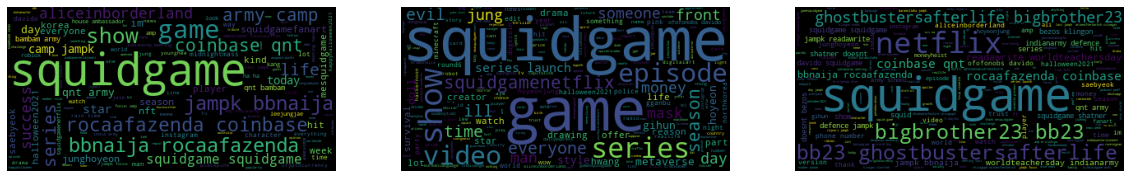

In [150]:
fig = plt.figure(figsize=(20,13))
#convert list to string and generate
unique_string_positive = (" ").join(aspect_terms_positive)
wordcloud_positive = WordCloud().generate(unique_string_positive)
ax = fig.add_subplot(1,3,1)
ax.imshow(wordcloud_positive)
ax.axis('off')

unique_string_negative = (" ").join(aspect_terms_negative)
wordcloud_negative = WordCloud().generate(unique_string_negative)
ax = fig.add_subplot(1,3,2)
ax.imshow(wordcloud_negative)
ax.axis('off')

unique_string_neutral = (" ").join(aspect_terms_neutral)
wordcloud_neutral = WordCloud().generate(unique_string_neutral)
ax = fig.add_subplot(1,3,3)
ax.imshow(wordcloud_neutral)
ax.axis('off')
